## Handwriting Classification Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading data

In [2]:
data = np.load('data/mnist_train_small.npy')

In [3]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X = data[:,1:]
y = data[:, 0]

In [5]:
X.shape , y.shape

((19999, 784), (19999,))

This shows that the data have 19999 examples containing 784 features.

### Plotting the first number given in the dataset

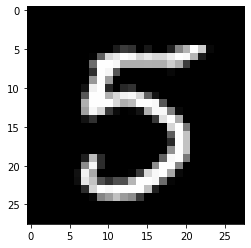

In [6]:
plt.imshow(X[0].reshape(28,28), cmap = 'gray')

### Crosschecking with the dataset

In [7]:
y[0]

5

### Spliting data into Training and Testing data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train.shape, y_train.shape

((13399, 784), (13399,))

In [10]:
X_test.shape, y_test.shape

((6600, 784), (6600,))

### Applying KNN alogorithm

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier()

Prediciting values of first 10 inputs of Testing data

In [13]:
model.fit(X_train, y_train)
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

Checking if the result is correct

In [14]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

Here the first output is incorrect rest are correct. Let's see what it looks like

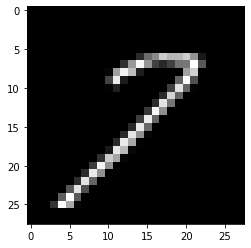

In [15]:
plt.imshow(X_test[0].reshape(28,28),cmap="gray")

It's similar to 1 but it actually is 7

### Checking accuracy of the model

In [16]:
accuracy = model.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 95.42424242424242 %


### Custom KNN - making the algorithm from scratch

In [17]:
class CustomKNN:
    def __init__(self,n_neighbours=5):
        self.n_neighbours = n_neighbours
    def fit(self,X,y):
        self._X = X.astype(np.int64)
        self._y = y
    def predict_point(self,point):
        list_dist=[]
        for x_point,y_point in zip(self._X,self._y):
            dist_point = ((point - x_point)**2).sum()
            list_dist.append([dist_point,y_point])
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        items, counts = np.unique(np.array(top_k)[:,1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
    def predict(self,X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    def score(self,X,y):
        return sum(self.predict(X) == y)/ len(y)

In [18]:
model2 = CustomKNN()

In [19]:
model2.fit(X_train, y_train)

In [20]:
model2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [21]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [22]:
model2.score(X_test[:100],y_test[:100])

0.95